# 5. Building a Model to Predict Survival <a class="anchor"  id="chapter5"></a>

Below, I will try a few different models that are appropriate for predicting binary outcomes. Note that I am splitting the original training set (which contains no missing values for 'Survival') into a further training and test set so that I can test the accuracy of the model before submitting my predictions. 

Models:
- Logistic Regression:  a statistical model that is commonly used to predict binary outcomes, assumes a linear relationship between the input variables and the log-odds of the outcome
- Random Forest Classifier: an ensemble learning model that combines multiple decision trees to create a more accurate model, randomly selects a subset of features for each tree to prevent overfitting and improve accuracy
- K-Nearest Neighbors: predicts categorical outcome by based on k-closest neighbors in the training set 
- Support Vector Machines (SVMs): a model that finds the best hyperplane to separate the data into different classes, and then predicts the target variable based on the position of the test point relative to the hyperplane
- Naive Bayes: a probabilistic classification algorithm based on Bayes' theorem, assumes that the input variables are normally distributed and independent 
- Gradient Boosting Classifier: ensemble model that combines multiple weak learners, normally decision trees, to create a strong learned for classification problems 
- Decision Tree Classifier: tree-like model that splits data based on the feature that maximizes information gain or reduces impurity at each node 
- Bagging Classifier: Boostrap aggregation method that uses one algorithm on different subsets of the training set

I will test the cross-validation scores for each model using default parameters. From there, I will take the best models of the bunch and do some more hyperparameter tuning to see if I can improve their performance further. 

## 5.1 Testing Multiple Models <a class="anchor"  id="section_5_1"></a>

In [31]:
display(combined_cleaned.columns)

Index(['Title', 'Sex', 'Pclass', 'Embarked', 'PassengerId', 'Survived', 'Age',
       'SibSp', 'Parch', 'In_WCG', 'WCG_not_survived', 'WCG_survived',
       'Family_size', 'Ticket_group_size', 'Party_size', 'Is_alone',
       'Fare_per_passenger', 'Age_cat', 'Title_Miss.', 'Title_Mr.',
       'Title_Mrs.', 'Title_Uncommon', 'Sex_male', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [32]:
# Importing additional libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Splitting combined_cleaned data set back into original train and test sets
train_original['Survived'] = train_original['Survived'].astype(int)

# Splitting training data into features and outcome variable
X = train_original[[
       'SibSp', 'Parch', 'In_WCG',
       'WCG_not_survived', 'WCG_survived', 
       'Party_size', 'Is_alone', 'Fare_per_passenger', 'Title_Miss.',
       'Title_Mr.', 'Title_Mrs.', 'Title_Uncommon', 'Sex_male', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Age_cat']]
y = train_original[['Survived']].values.ravel()

# Splitting training data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Scaling the Fare_per_passenger to create scaled training and test sets
scaler = StandardScaler()

X_train_num = X_train.loc[:, ['Fare_per_passenger']]
X_test_num = X_test.loc[:, ['Fare_per_passenger']]

X_train_cat = X_train.loc[:, ['SibSp', 'Parch','In_WCG',
       'WCG_not_survived', 'WCG_survived', 
       'Party_size', 'Is_alone',  'Title_Miss.',
       'Title_Mr.', 'Title_Mrs.', 'Title_Uncommon', 'Sex_male', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Age_cat']]
X_test_cat = X_test.loc[:, ['SibSp', 'Parch', 'In_WCG',
       'WCG_not_survived', 'WCG_survived', 
       'Party_size', 'Is_alone', 'Title_Miss.',
       'Title_Mr.', 'Title_Mrs.', 'Title_Uncommon', 'Sex_male', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Age_cat']]

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Concatenate scaled numerical and categorical columns
X_train_scaled = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now I will test multiple models on the test set and also using K-fold cross validation. This will give me a quick idea of how I can expect each model to perform on new, unseen data.

Logistic Regression Mean Cross-Validation Accuracy Score: 0.8496995961784695
Random Forest Classifier Mean Cross-Validation Accuracy Score: 0.8413276863981091
KNN Mean Cross-Validation Accuracy Score: 0.8356446370530879
Support Vector Classifier Mean Cross-Validation Accuracy Score: 0.8581404510981976
Naive Bayes Mean Cross-Validation Accuracy Score: 0.8553432483009947
Gradient Boosting Mean Cross-Validation Accuracy Score: 0.863774253915099
Decision Tree Classifer Mean Cross-Validation Accuracy Score: 0.8328671328671329
Bagging Mean Cross-Validation Accuracy Score: 0.8567418496995961


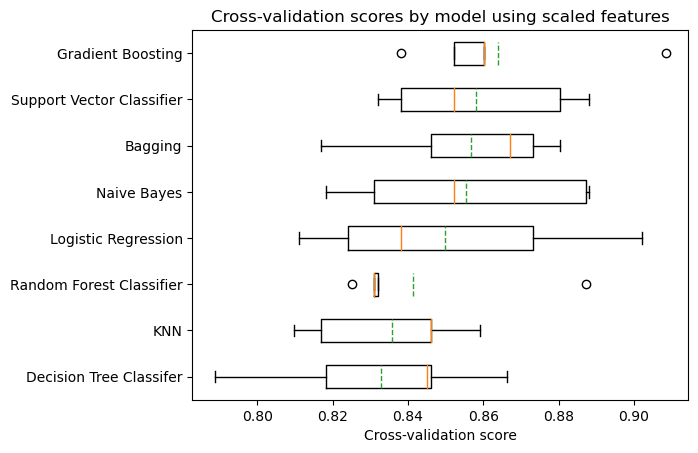

Logistic Regression Test Set Accuracy: 0.8603351955307262
Random Forest Classifier Test Set Accuracy: 0.8435754189944135
KNN Test Set Accuracy: 0.8491620111731844
Support Vector Classifier Test Set Accuracy: 0.8603351955307262
Naive Bayes Test Set Accuracy: 0.8659217877094972
Gradient Boosting Test Set Accuracy: 0.8659217877094972
Decision Tree Classifer Test Set Accuracy: 0.8659217877094972
Bagging Test Set Accuracy: 0.8603351955307262


In [33]:
# Testing multiple models on scaled features
np.random.seed(41)
models ={"Logistic Regression": LogisticRegression(max_iter=2000, random_state=41), "Random Forest Classifier": RandomForestClassifier(random_state=41), 
         "KNN": KNeighborsClassifier(), "Support Vector Classifier": SVC(random_state=41), "Naive Bayes": GaussianNB(), 
         "Gradient Boosting": GradientBoostingClassifier(random_state=41), "Decision Tree Classifer": DecisionTreeClassifier(random_state=41), 
         "Bagging": BaggingClassifier(random_state=41)}
results = []
for name, model in models.items():
	kf = KFold(n_splits=5, random_state=41, shuffle=True)
	cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf) 
	results.append(cv_results)
	print("{} Mean Cross-Validation Accuracy Score: {}".format(name, cv_results.mean()))
    
# Sort the models by the mean cross-validation accuracy score
sorted_results = sorted(zip(models.keys(), results), key=lambda x: x[1].mean(), reverse=False)
labels = [model[0] for model in sorted_results]
results = [model[1] for model in sorted_results]

plt.boxplot(results, labels=labels, meanline=True, showmeans=True, vert=False)
plt.title('Cross-validation scores by model using scaled features')
plt.xlabel('Cross-validation score')
plt.show()

# Model performance on test set
for name, model in models.items(): 
	model.fit(X_train_scaled, y_train)
	test_score = model.score(X_test_scaled, y_test)
	print("{} Test Set Accuracy: {}".format(name, test_score))

Above, I tested the accuracy of each model using default features. The one exception is that I increased the max iterations for the Logistic Regression model from 1000 to 2000 as it failed to converge otherwise. 

On the test set, the best performing models were Bagging Classifier, Gradient Boosting Classifier, and Naive Bayes, all with accuracies of 86.59%. 

I also found the cross-validation scores for each model using K-Fold cross validation to estimate how each model could be expected to perform on new, unseen data. The models with the best CV accuracy scores are **Gradient Boosting** with a mean CV score of 86.38% and **Support Vector Classifier** with a mean CV score of 85.81%.

I will take these two best models in terms of cross-validation scores and tune their hyperparameters to see if I can further increase their accuracy. 

## 5.2 Gradient Boosting <a class="anchor"  id="section_5_2"></a>

Gradboost accuracy on test set with default params: 0.8659217877094972
Gradboost mean CV score with default params: 0.863774253915099
Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'learning_rate': 0.1, 'max_depth': 6, 'max_leaf_nodes': 7, 'n_estimators': 100}
Gradboost accuracy on test set with best params: 0.8715083798882681
Gradboost mean CV score using best hyperparameters: 0.8735743130109327


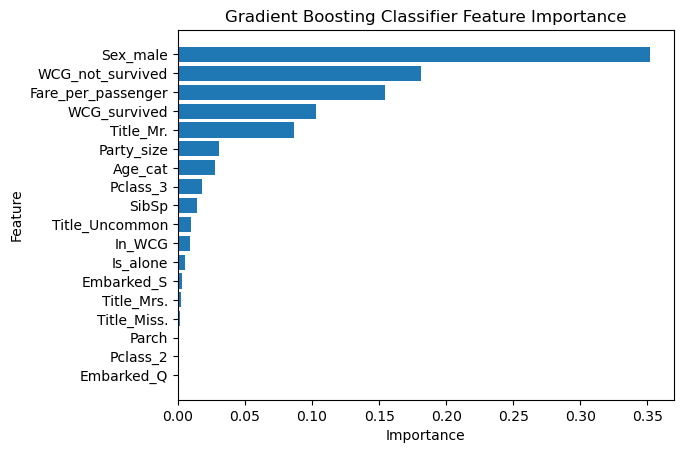

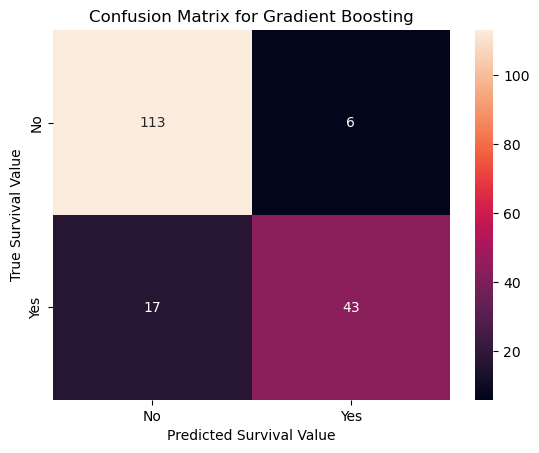

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       119
           1       0.88      0.72      0.79        60

    accuracy                           0.87       179
   macro avg       0.87      0.83      0.85       179
weighted avg       0.87      0.87      0.87       179



In [34]:
# Checks gradient boosting regression accuracy on test set using default model parameters
gradboost = GradientBoostingClassifier(random_state=41)
model = gradboost.fit(X_train_scaled, y_train)
gradboost_score = gradboost.score(X_test_scaled, y_test)
print("Gradboost accuracy on test set with default params:", gradboost_score)

np.random.seed(41)
# Cross validation score 
# Estimates how default gradient boosting regression model would perform on new, unseen data
kf = KFold(n_splits=5, shuffle=True, random_state=41)
cv_results = cross_val_score(gradboost, X_train_scaled, y_train, cv=kf)
print("Gradboost mean CV score with default params:", cv_results.mean())

# Checking best hyperparameters for gradient boosting model
# Note that I tried numerous values below, but am only including a few to keep this section from getting too computationally expensive

gradboost_params = {
    "n_estimators": [75, 100, 150],
    "max_leaf_nodes": [6, 7, 8],
    "learning_rate": [0.05, 0.1, 0.15],
    "max_depth": [5, 6, 7]
}
gradboost_cv = GridSearchCV(gradboost, gradboost_params, cv=kf, verbose=1, n_jobs=-1)
gradboost_cv.fit(X_train_scaled, y_train)
print(gradboost_cv.best_params_)

# Fit gradient boosting regression model with best hyperparameters found through GridSearchCV
gradboost_best = GradientBoostingClassifier(n_estimators=100, max_leaf_nodes=7,
                                            learning_rate=0.1, max_depth=6, random_state=41)
gradboost_best.fit(X_train_scaled, y_train)
y_pred = gradboost_best.predict(X_test_scaled)
gradboost_score = gradboost_best.score(X_test_scaled, y_test)
cv_results_best = cross_val_score(gradboost_best, X_train_scaled, y_train, cv=kf)          
print("Gradboost accuracy on test set with best params: {}".format(gradboost_score))     
print("Gradboost mean CV score using best hyperparameters: {}".format(cv_results_best.mean()))

feature_names = np.array(['Fare_per_passenger', 'SibSp', 'Parch', 'In_WCG',
       'WCG_not_survived', 'WCG_survived', 
       'Party_size', 'Is_alone',  'Title_Miss.',
       'Title_Mr.', 'Title_Mrs.', 'Title_Uncommon', 'Sex_male', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Age_cat'])

# Plotting feature importances
importances = gradboost_best.feature_importances_
sort_index = np.argsort(importances)
sorted_importances = importances[sort_index]
sorted_feature_names = feature_names[sort_index]
plt.barh(sorted_feature_names, sorted_importances)
plt.title('Gradient Boosting Classifier Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Create confusion matrix
gradboost_cm = confusion_matrix(y_test, y_pred)

# Create heatmap plot of confusion matrix
sns.heatmap(gradboost_cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Survival Value')
plt.ylabel('True Survival Value')
plt.show()

# Create classification report
gradboost_report=classification_report(y_test, y_pred)
print(gradboost_report)

Above I have tested the Gradient Boosting Classifier model on the scaled data using default parameters and adjusted parameters.

As we saw before, the Gradient Boosting model with default parameters is already 86.59% accurate at predicting survival in the test set, and has a cross-validation accuracy score of 86.38%. 

I tested for the best hyperparameters for the model using GridSearchCV, and found that they are n_estimators=100, max_leaf_nodes=7, learning_rate=0.1, and max_depth=6. After updating the hyperparameters, the model is now 87.15% accurate at predicting survival in the test set, and the cross-validation accuracy score has gone up to 87.36%. This means that the model should be about 87.35% accurate at predicting survival in a new, unseen dataset.

I also created a feature importance plot and confusion matrix. The feature importance plot tells us what features the model finds most important when predicting the survival of a passenger. In this plot, the importance is measured as an absolute value, and thus the plot does not reflect the direction of the relationship, just the strength. For example, 'Sex_male' is the most important feature in predicting survival, but this plot does not tell us whether those who are male are more or less likely to survive. 

The confusion matrix breaks down the model's predicted outcomes versus the actual outcomes in the test set. We can see that there are 17 instances where the model incorrectly predicted that the passenger would not survive when they did, and 6 instances where the model incorrectly predicted that the passenger would survive when they didn't. 

Finally, the classification report breaks down some more information regarding the tuned model's predictions.
- The precision for the "0" class is 0.87, which means that when the model predicted a passenger  died, it was correct 87% of the time. Similarly, the precision for the "1" class is 0.88, which means that when the model predicted a passenger survived, it was correct 88% of the time.
- The recall for the "0" class is 0.95, which means that out of all the true passenger deaths in the test set, the model correctly identified 95% of them. Similarly, the recall for the "1" class is 0.72, which means that out of all the true passenger survivals in the test set, the model correctly identified 72% of them.
- F1 score is the harmonic mean of the precision and recall of a model. The F1 score for the "0" class is 0.91, while the F1 score for the "1" class is 0.79. These scores provide an indication of the model's overall performance for each class, taking into account both precision and recall.

## 5.3 Support Vector Classifier <a class="anchor"  id="section_5_3"></a>

SVC accuracy on test set with default params: 0.8603351955307262
SVC mean CV score with default params: 0.8581404510981976
Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
SVC accuracy on test set with best params: 0.8603351955307262
SVC mean CV score using best hyperparameters: 0.8637644046094749


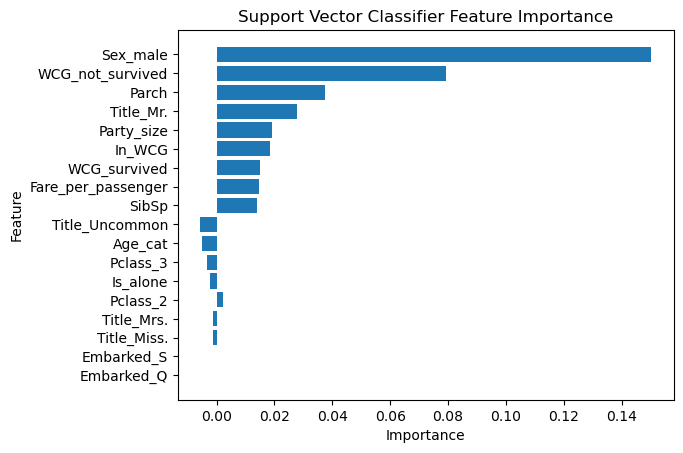

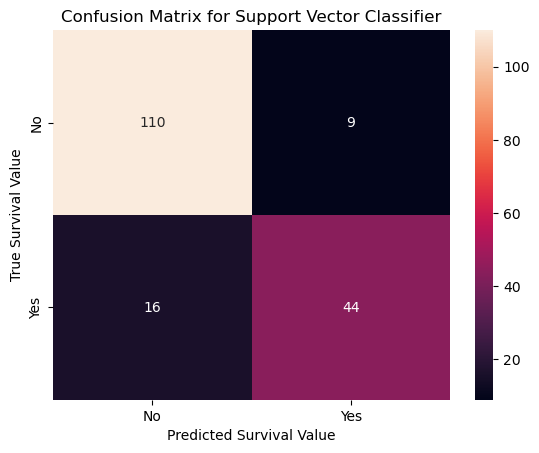

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       119
           1       0.83      0.73      0.78        60

    accuracy                           0.86       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



In [35]:
# Checks SVC boosting regression accuracy on test set using default model parameters
svc = SVC(random_state=41)
model = svc.fit(X_train_scaled, y_train)
svc_score = svc.score(X_test_scaled, y_test)
print("SVC accuracy on test set with default params:", svc_score)

np.random.seed(41)
# Cross validation score 
# Estimates how default SVC regression model would perform on new, unseen data
kf = KFold(n_splits=5, shuffle=True, random_state=41)
cv_results = cross_val_score(svc, X_train_scaled, y_train, cv=kf)
print("SVC mean CV score with default params:", cv_results.mean())

# Checking best hyperparameters for SVC model
# Note that I tried numerous values below, but am only including a few to keep this section from getting too computationally expensive

svc_params = {
    "gamma": [0.0001, 0.01, 0.1, 1],
    "C": [0.1, 1, 10],
    "degree": [2, 3, 4],
    "kernel": ['poly', 'linear', 'sigmoid', 'rbf'] 
}
svc_cv = GridSearchCV(svc, svc_params, cv=kf, verbose=1, n_jobs=-1)
svc_cv.fit(X_train_scaled, y_train)
print(svc_cv.best_params_)

# Fit SVC model with best hyperparameters found through GridSearchCV
svc_best = SVC(gamma=0.1, C=1, degree=2, kernel='poly')
svc_best.fit(X_train_scaled, y_train)
y_pred = svc_best.predict(X_test_scaled)
svc_score = svc_best.score(X_test_scaled, y_test)
cv_results_best = cross_val_score(svc_best, X_train_scaled, y_train, cv=kf)         
print("SVC accuracy on test set with best params: {}".format(svc_score))     
print("SVC mean CV score using best hyperparameters: {}".format(cv_results_best.mean()))

# Calculate permutation feature importances
result = permutation_importance(svc_best, X_test_scaled, y_test, n_repeats=10, random_state=41)

# Extract feature importances and their indices
importances = result.importances_mean
indices = np.argsort(np.abs(importances))

# Plot feature importances
plt.barh(range(X_test_scaled.shape[1]), importances[indices])
plt.yticks(range(X_test_scaled.shape[1]), feature_names[indices])
plt.title('Support Vector Classifier Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Create confusion matrix
svc_cm = confusion_matrix(y_test, y_pred)

# Create heatmap plot of confusion matrix
sns.heatmap(svc_cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Support Vector Classifier')
plt.xlabel('Predicted Survival Value')
plt.ylabel('True Survival Value')
plt.show()

# Create classification report
svc_report=classification_report(y_test, y_pred)
print(svc_report)

Above I have tested the Support Vector Classifier model on the scaled data using default parameters and adjusted parameters.

As we saw before, the SVC model with default parameters is 86.03% accurate at predicting survival in the test set, and has a cross-validation accuracy score of 85.81%. 

I tested for the best hyperparameters for the model, and found that they are C = 1, degree = 2, gamma = 0.1, and kernel = 'poly'. After updating the hyperparameters, the model is still 86.03% accurate at predicting survival in the test set, but the cross-validation accuracy score has gone up to 86.38%. This means that the model should be about 86.38% accurate at predicting survival in a new, unseen dataset.

I also created a feature importance plot using permutation_importance, as SVC does not normally give feature importances unless the kernel is linear, which in this case, it is not. The feature importance plot tells us what features the model finds most important when predicting the survival of a passenger. When using permutation feature importance, negative values normally indicate that a feature is not informative or impactful to a model's performance. We can see that the most impactful features for this model were 'Sex_male', 'WCG_not_survived', and 'Parch'. 

The confusion matrix breaks down the model's predicted outcomes versus the actual outcomes in the test set. We can see that there are 16 instances where the model incorrectly predicted that the passenger would not survive when they did, and 9 instances where the model incorrectly predicted that the passenger would survive when they didn't. 

Finally, the classification report breaks down some more information regarding the tuned model's predictions.

* The precision for the "0" class is 0.87, which means that when the model predicted a passenger died, it was correct 87% of the time. Similarly, the precision for the "1" class is 0.83, which means that when the model predicted a passenger survived, it was correct 83% of the time.
* The recall for the "0" class is 0.92, which means that out of all the true passenger deaths in the test set, the model correctly identified 92% of them. Similarly, the recall for the "1" class is 0.73, which means that out of all the true passenger survivals in the test set, the model correctly identified 73% of them.
* F1 score is the harmonic mean of the precision and recall of a model. The F1 score for the "0" class is 0.90, while the F1 score for the "1" class is 0.78. These scores provide an indication of the model's overall performance for each class, taking into account both precision and recall.